In [2]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
%matplotlib inline

In [3]:
gpa = pd.read_csv("../data/GPA.csv").dropna()
transfers = pd.read_csv("../data/Transfers.csv").fillna(0)
freshmen = pd.read_csv("../data/Freshmen.csv").fillna(0)

In [4]:
gpa.head()

,Calculation1,Campus,City,County/State/Country,Fall Term,Level,School,Adm GPA (SUM),App GPA (SUM),Enrl GPA (SUM)
8,JAMES A GARFIELD HIGH SCHOOL051635,Berkeley,Los Angeles,Los Angeles,2014,Freshman,JAMES A GARFIELD HIGH SCHOOL,4.118000,3.762895,4.055714
9,MONTEREY HIGH SCHOOL052050,Universitywide,Monterey,Monterey,2004,Freshman,MONTEREY HIGH SCHOOL,3.834565,3.714545,3.812759
12,ABRAHAM LINCOLN HIGH SCHOOL051520,Universitywide,Los Angeles,Los Angeles,2008,Freshman,ABRAHAM LINCOLN HIGH SCHOOL,3.566000,3.413882,3.609592
13,SACRAMENTO HIGH SCHOOL052735,Universitywide,Sacramento,Sacramento,2008,Freshman,SACRAMENTO HIGH SCHOOL,3.416607,3.250000,3.322759
14,AMADOR VALLEY HIGH SCHOOL052495,Santa Cruz,Pleasanton,Alameda,2003,Freshman,AMADOR VALLEY HIGH SCHOOL,3.582174,3.574400,3.415000


In [5]:
gpa['Fall Term']

8         2014
9         2004
12        2008
13        2008
14        2003
19        2015
22        2010
23        1994
36        2007
49        2005
54        2013
55        1995
62        2015
63        2013
66        2012
67        2014
70        1995
71        2003
75        2006
80        2013
86        2013
88        2005
89        2013
91        2003
103       1994
104       2008
111       2008
114       2009
118       2001
119       1996
          ... 
333203    2016
333207    2017
333214    1994
333215    1995
333216    1995
333218    1996
333224    1998
333225    1998
333228    1999
333229    1999
333231    2000
333235    2001
333240    2002
333245    2003
333251    2005
333255    2006
333259    2007
333261    2007
333266    2008
333271    2009
333276    2010
333278    2010
333283    2011
333287    2012
333288    2012
333292    2013
333293    2013
333305    2016
333310    2017
333311    2017
Name: Fall Term, Length: 89531, dtype: int64

# Initial Exploratory Tasks

1. How many high schools are in each of the datasets? How many years do each of the datasets cover?
2. How many high schools are included in all three of the datasets? How many high schools are included in only 2 of the datasets? How many high schools are included in only one of the datasets?
3. What high schools have the highest number of freshmen admitted? What high schools schools have the highest number of transfer students admitted? How does this differ across UC campuses?
4. What high schools have the highest freshman admit rate? What schools have the highest freshmen transfer rate? How would would you even calculate these things? :o How does this differ across UC campuses?
5. What California counties are most represented in the data? What non-California states are most represented in the data? What other countries are most represented in the data? How does this differ across UC campuses?
6. Of the high schools that have students admitted, which high school has the highest ratio of admitted GPA to enrolled GPA? Of the high schools that have students enrolled, which high school has the highest ratio of enrolled GPA to admitted GPA? Is there a significant (linear) correlation between high school GPA and acceptance into a particular UC campus?
7. What is the relationship between admit rate and admit GPA? (Answer through a visualization) How is this different between the relationship between enrollment rate and enrollment GPA? How does this differ across each UC Campus?
8. How different is the admit rate between different ethnicities? How does this relate to the enrollment rate between different ethnicities? How does this vary between freshmen and transfer students? How does this vary across different campuses?

In [6]:
counties = pd.read_csv('../data/counties.csv').sort_values('2018 Population', ascending=False)

In [7]:
counties['Name'] = counties['Name'].str.slice(stop=-7)

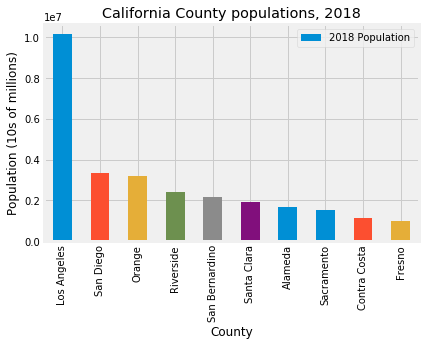

In [8]:
counties[:10].plot.bar(x="Name", y="2018 Population")
plt.ylabel("Population (10s of millions)")
plt.xlabel("County")
plt.title('California County populations, 2018')
plt.savefig('../images/county_populations.png', bbox_inches='tight', dpi=200)

In [9]:
gpa_unique_count = gpa.groupby(["County/State/Country"])['Adm GPA (SUM)'].count().sort_values(ascending=False).reset_index()

In [10]:
gpa_unique_count_merged = gpa_unique_count.merge(counties, left_on="County/State/Country", right_on="Name", how="inner").sort_values(by="Adm GPA (SUM)", ascending=False)[:10]

In [11]:
admittance_by_capita = pd.Series(data=(gpa_unique_count_merged['Adm GPA (SUM)']/gpa_unique_count_merged['2018 Population']).values, index=gpa_unique_count_merged['County/State/Country']).sort_values(ascending=False)

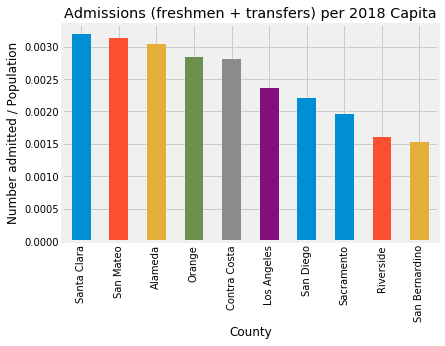

In [12]:
admittance_by_capita[:10].plot.bar()
plt.ylabel("Number admitted / Population")
plt.xlabel("County")
plt.title('Admissions (freshmen + transfers) per 2018 Capita')
plt.savefig('../images/county_capita_ratio.png', bbox_inches='tight', dpi=200)

In [13]:
transfers = transfers.rename(columns = {'adm (SUM)':'admitted', 'app (SUM)':'applied', 'enr (SUM)':'enrolled', 'Uad Uc Ethn 6 Cat':'Ethnicity'})

In [14]:
freshmen = freshmen.rename(columns = {'adm (SUM)':'admitted', 'app (SUM)':'applied', 'enr (SUM)':'enrolled', 'Uad Uc Ethn 6 Cat':'Ethnicity'})

In [15]:
gpa = gpa.rename(columns = {'Adm GPA (SUM)':'admitted_gpa', 'App GPA (SUM)':'applied_gpa', 'Enrl GPA (SUM)':'enrolled_gpa'})

In [16]:
grouped_admitted_freshmen = freshmen.groupby(['Fall Term', 'Campus','Ethnicity']).admitted.agg(['sum'])
grouped_enrolled_freshmen = freshmen.groupby(['Fall Term', 'Campus','Ethnicity']).enrolled.agg(['sum'])
grouped_applied_freshmen = freshmen.groupby(['Fall Term', 'Campus','Ethnicity']).applied.agg(['sum'])

In [17]:
grouped_admitted_transfers = transfers.groupby(['Fall Term', 'Campus','Ethnicity']).admitted.agg(['sum'])
grouped_enrolled_transfers = transfers.groupby(['Fall Term', 'Campus','Ethnicity']).enrolled.agg(['sum'])
grouped_applied_transfers = transfers.groupby(['Fall Term', 'Campus','Ethnicity']).applied.agg(['sum'])

In [18]:
grouped_admitted_applied_freshmen = grouped_admitted_freshmen / grouped_applied_freshmen
grouped_enrolled_admitted_freshmen = grouped_enrolled_freshmen / grouped_admitted_freshmen
grouped_enrolled_applied_freshmen = grouped_enrolled_freshmen / grouped_admitted_freshmen

In [20]:
graph_grouped_admitted_applied_freshmen = (grouped_admitted_applied_freshmen.query('Campus == "Berkeley"') * 100).reset_index()

In [21]:
five_thirty_eight = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
]

sns.set_palette(five_thirty_eight)

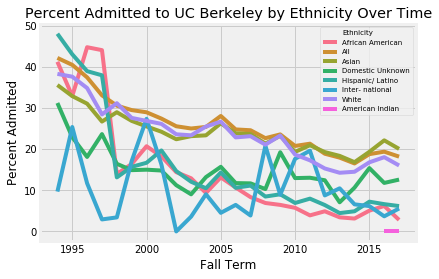

In [22]:
sns.lineplot(x="Fall Term", y="sum", hue="Ethnicity", data=graph_grouped_admitted_applied_freshmen)
plt.ylabel("Percent Admitted")
plt.title("Percent Admitted to UC Berkeley by Ethnicity Over Time")
plt.legend(loc=1, prop={'size': 7})
plt.savefig('../images/berkeley_ethnicity_time.png', bbox_inches='tight', dpi=300)


In [23]:
graph_grouped_enrolled_admitted_freshmen = (grouped_enrolled_admitted_freshmen.query('Campus == "Berkeley"') * 100).reset_index()

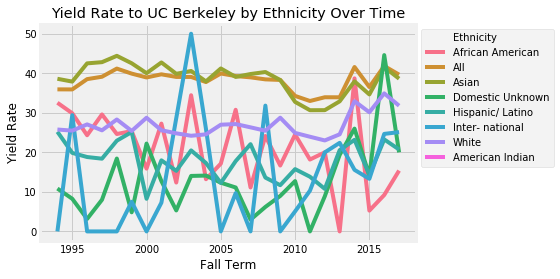

In [24]:
sns.lineplot(x="Fall Term", y="sum", hue="Ethnicity", data=graph_grouped_enrolled_admitted_freshmen)
plt.ylabel("Yield Rate")
plt.title("Yield Rate to UC Berkeley by Ethnicity Over Time")
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('../images/berkeley_ethnicity_time_yield.png', bbox_inches='tight', dpi=300)

In [25]:
grouped_admitted_freshmen = grouped_admitted_freshmen.drop("All", level=2)

In [26]:
graph_grouped_admitted_freshmen = grouped_admitted_freshmen.query('Campus == "Berkeley"').reset_index()

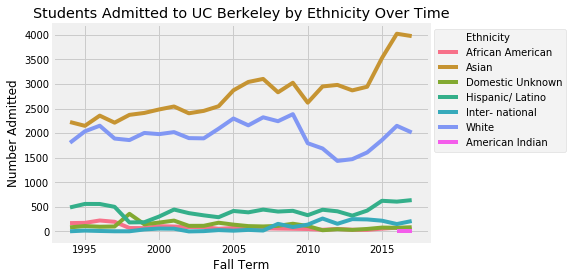

In [27]:
sns.lineplot(x="Fall Term", y="sum", hue="Ethnicity", data=graph_grouped_admitted_freshmen)
plt.ylabel("Number Admitted")
plt.title("Students Admitted to UC Berkeley by Ethnicity Over Time")
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('../images/berkeley_ethnicity_time_count.png', bbox_inches='tight', dpi=300)

In [28]:
graph_grouped_admitted_applied_freshmen_all = (grouped_admitted_applied_freshmen * 100).reset_index()

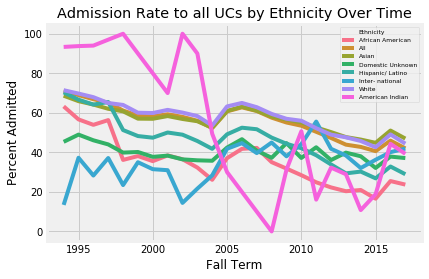

In [29]:
sns.lineplot(x="Fall Term", y="sum", hue="Ethnicity", data=graph_grouped_admitted_applied_freshmen_all,err_style=None, dashes=True)
plt.ylabel("Percent Admitted")
plt.title("Admission Rate to all UCs by Ethnicity Over Time")
plt.legend(loc=1, prop={'size': 6})
plt.savefig('../images/uc_ethnicity_time.png', bbox_inches='tight', dpi=300)

In [30]:
sorted_gpa = gpa.groupby(["Campus", "Fall Term"]).mean().reset_index()

In [31]:
sorted_gpa_berkeley = sorted_gpa.query('Campus == "Berkeley"')

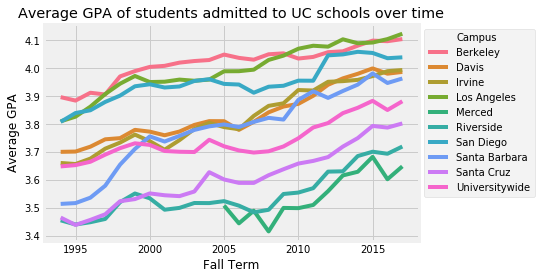

In [32]:
sns.lineplot(x="Fall Term", y="admitted_gpa", hue="Campus", data=sorted_gpa,err_style=None, dashes=True)
plt.ylabel("Average GPA")
plt.title("Average GPA of students admitted to UC schools over time")
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('../images/uc_gpa_time_admitted.png', bbox_inches='tight', dpi=300)

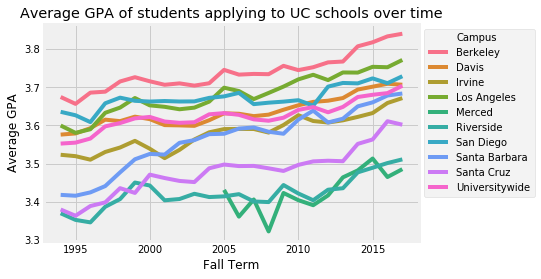

In [33]:
sns.lineplot(x="Fall Term", y="applied_gpa", hue="Campus", data=sorted_gpa,err_style=None, dashes=True)
plt.ylabel("Average GPA")
plt.title("Average GPA of students applying to UC schools over time")
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('../images/uc_gpa_time_applied.png', bbox_inches='tight', dpi=300)

In [37]:
sorted_gpa['admitted-applied'] = sorted_gpa['admitted_gpa'] - sorted_gpa['applied_gpa']

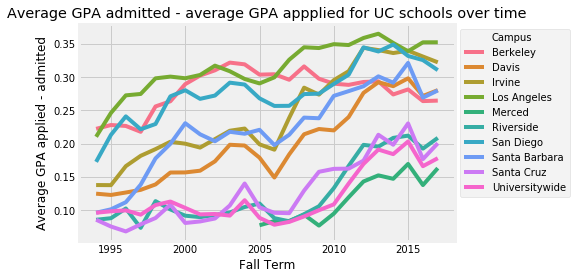

In [38]:
sns.lineplot(x="Fall Term", y="admitted-applied", hue="Campus", data=sorted_gpa,err_style=None, dashes=True)
plt.ylabel("Average GPA applied - admitted")
plt.title("Average GPA admitted - average GPA appplied for UC schools over time")
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('../images/uc_gpa_time_applied_admitted.png', bbox_inches='tight', dpi=300)

In [113]:
freshmen_by_ethnicity = freshmen[(freshmen["Fall Term"] == 2017) & (freshmen["Campus"] == "Berkeley")].groupby(["Ethnicity"])['enrolled'].sum()

In [116]:
freshmen_by_ethnicity = freshmen_by_ethnicity.drop("All")

In [118]:
freshmen_by_ethnicity

Ethnicity
African American       6.0
American Indian        0.0
Asian               1535.0
Domestic Unknown      17.0
Hispanic/ Latino     132.0
Inter- national       53.0
White                640.0
Name: enrolled, dtype: float64

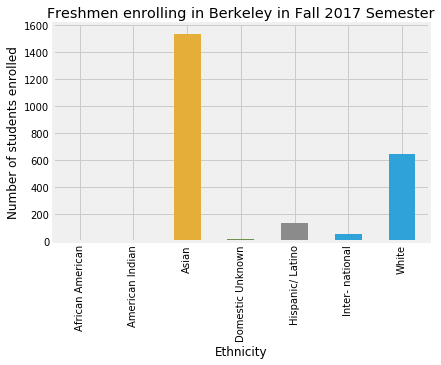

In [122]:
freshmen_by_ethnicity.plot.bar()
plt.ylabel("Number of students enrolled")
plt.title("Freshmen enrolling in Berkeley in Fall 2017 Semester")
plt.savefig('../images/berkeley_2017_enrolled.png', bbox_inches='tight', dpi=300)

In [125]:
transfers_by_ethnicity = transfers[(transfers["Fall Term"] == 2017) & (transfers["Campus"] == "Berkeley")].groupby(["Ethnicity"])['enrolled'].sum()

In [126]:
transfers_by_ethnicity = transfers_by_ethnicity.drop("All")

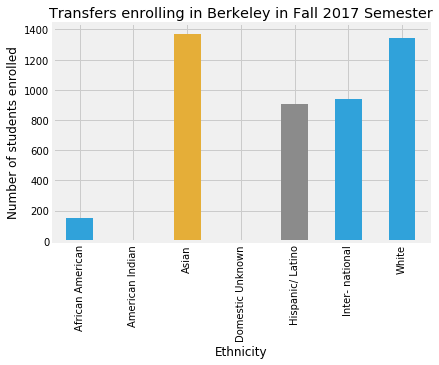

In [127]:
transfers_by_ethnicity.plot.bar()
plt.ylabel("Number of students enrolled")
plt.title("Transfers enrolling in Berkeley in Fall 2017 Semester")
plt.savefig('../images/berkeley_2017_enrolled_transfers.png', bbox_inches='tight', dpi=300)